# Semana 16-18 - Exercício 3

Para  o  sistema  anterior (Exercício 2),  implemente  um  controlador  PID,  efetuando  a  sintoniade  forma manual, com 𝑇𝑠=0,01[𝑠].

# Bibliotecas

In [1]:
#Bibliotecas
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

# Funções

In [2]:
def x_dot(t,x,u):
    A = np.array([[-2.0,-0.9],[10.0,0.0]])
    B = np.array([[-1.0],[0.0]])
    xkp1 = A @ x + B @ u
    return xkp1

def rk4(tk,h,xk,uk):
    xk = xk.reshape([2,1])
    uk = uk.reshape([1,1])

    k1 = x_dot(tk,xk,uk)
    k2 = x_dot(tk+h/2.0,xk+h*k1/2.0,uk)
    k3 = x_dot(tk+h/2.0,xk+h*k2/2.0,uk)
    k4 = x_dot(tk+h,xk+h*k3,uk)

    xkp1 = xk + (h/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return xkp1.reshape([2,])

In [3]:
#Requisitos
Ts = 0.01
h = 1e-4
maxT = 10
mult = Ts/h
t = np.arange(0,maxT,h)
tu = np.arange(0,maxT,Ts)

#Função de Transferência
G = tf([9],[1,2,9])
Gss = tf2ss(G)

x = np.zeros([2,len(t)])
u = np.zeros([len(tu)])
r = np.ones([len(t)-1])
y = np.zeros([len(t)-1])

kmax = len(t)-1

Kp = 32
Ki = 128
Kd = 2
ekm1 = 0
ukm1 = 0
p = 0

for k in range(kmax):
    y[k] = Gss.C @ x[:,k]
    if (k%mult)==0:
        ek = r[k]-y[k]
        u[p] = Kp * ek + ukm1 + (Ki*Ts/2)*(ek + ekm1) + (2*Kd/Ts)*(ek - ekm1) - ukm1
        ekm1 = ek
        ukm1 = u[p]
        p += 1
    x[:,k+1] = rk4(t[k],h,x[:,k],u[p-1])

<ipython-input-2-7cbc5f4bdc0e>:16: RuntimeWarning: overflow encountered in add
  xkp1 = xk + (h/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
<ipython-input-3-763985db2bb2>:28: RuntimeWarning: invalid value encountered in matmul
  y[k] = Gss.C @ x[:,k]
<ipython-input-2-7cbc5f4bdc0e>:12: RuntimeWarning: invalid value encountered in add
  k2 = x_dot(tk+h/2.0,xk+h*k1/2.0,uk)
<ipython-input-2-7cbc5f4bdc0e>:4: RuntimeWarning: invalid value encountered in matmul
  xkp1 = A @ x + B @ u


# Gráfico 1

Text(0, 0.5, 'x2')

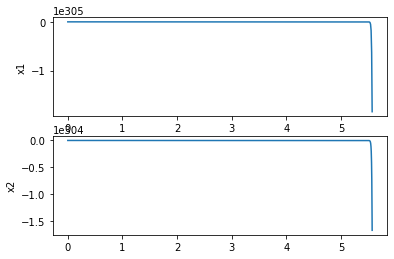

In [9]:
plt.figure('Figura 1')
plt.subplot(2,1,1)
plt.plot(t,x[0,:])
plt.ylabel('x1')
plt.subplot(2,1,2)
plt.plot(t,x[1,:])
plt.ylabel('x2')


# Gráfico 2

Text(0, 0.5, 'y')

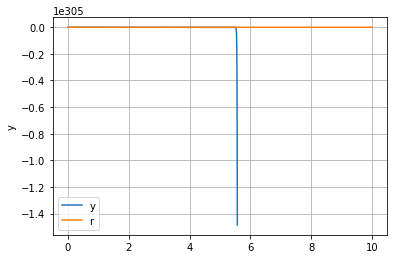

In [10]:
plt.figure('Figura 2')
plt.plot(t[0:-1],y,label='y')
plt.plot(t[0:-1],r,label='r')
plt.grid()
plt.legend()
plt.ylabel('y')

# Gráfico 3

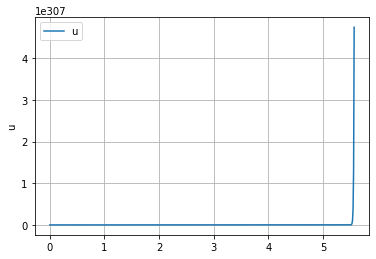

In [7]:
plt.figure('Figura 3')
plt.plot(tu[0:len(u)],u,label='u')
plt.grid()
plt.ylabel('u')
plt.legend()
plt.show()